In [1]:
import bs4 as bs
import urllib.request
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec

In [2]:
#Getting data from wikipedia website about coronavirus
source=urllib.request.urlopen('https://en.wikipedia.org/wiki/Coronavirus').read()
soup=bs.BeautifulSoup(source,'lxml')
text=""
for paragraph in soup.find_all('p'):
    text+=paragraph.text
text

'\nCoronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.\nCoronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales, and realm Riboviria.[6][7] They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.[8] The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.[9] They have characteristic club-shaped spikes t

In [3]:
# Preprocessing the data
text=re.sub(r'\[[0-9]*\]',' ',text)
#remove extra spaces
text=re.sub(r'\s+',' ',text)
#convert text into lowercase
text=text.lower()
#replace non-word character with space
#text=re.sub(r'\W',' ',text)
text=re.sub(r'[@#\$%&\*\(\)\<\>\?\'\":;\,\.\]\[-]'," ",text)
text=re.sub(r'\d',' ',text)
#remove extra spaces
text=re.sub(r'\s+',' ',text)

In [4]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]


In [5]:
nltk.download('stopwords')

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] 
                    if word not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to C:\Users\devanshu
[nltk_data]     suri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)


words = model.wv.vocab
words

{'coronaviruses': <gensim.models.keyedvectors.Vocab at 0x28a5927a488>,
 'group': <gensim.models.keyedvectors.Vocab at 0x28a5927a548>,
 'related': <gensim.models.keyedvectors.Vocab at 0x28a5927a5c8>,
 'rna': <gensim.models.keyedvectors.Vocab at 0x28a5927a788>,
 'viruses': <gensim.models.keyedvectors.Vocab at 0x28a5927a848>,
 'cause': <gensim.models.keyedvectors.Vocab at 0x28a5927aa48>,
 'diseases': <gensim.models.keyedvectors.Vocab at 0x28a5927aa88>,
 'mammals': <gensim.models.keyedvectors.Vocab at 0x28a5927ab48>,
 'birds': <gensim.models.keyedvectors.Vocab at 0x28a5927a808>,
 'humans': <gensim.models.keyedvectors.Vocab at 0x28a5927a988>,
 'respiratory': <gensim.models.keyedvectors.Vocab at 0x28a5927ad08>,
 'tract': <gensim.models.keyedvectors.Vocab at 0x28a5927ad88>,
 'infections': <gensim.models.keyedvectors.Vocab at 0x28a5927ae48>,
 'range': <gensim.models.keyedvectors.Vocab at 0x28a5927af08>,
 'mild': <gensim.models.keyedvectors.Vocab at 0x28a5927afc8>,
 'lethal': <gensim.models.key

In [7]:
# Test the word vectors
vector = model.wv['coronavirus']

print(vector)

[-3.2360887e-03  5.1498353e-03  4.1252188e-03  4.0736613e-03
  2.8676367e-03  2.1858304e-03 -2.9017418e-03  3.7744743e-04
 -3.2907820e-03 -1.1414607e-03  2.0650947e-03 -4.4133617e-03
  4.9736472e-03 -3.2752356e-03 -5.4486468e-03 -1.5672916e-03
 -3.4665277e-03 -3.9393613e-03 -5.0066062e-03 -2.1186864e-03
  2.1165586e-03 -2.4958532e-03 -2.1750682e-03 -1.5345073e-04
  1.4747763e-03 -1.0197570e-03 -1.8404409e-03 -2.9365835e-03
  9.2738483e-04  5.0109206e-03 -3.9044935e-03  2.7232079e-03
 -1.0824881e-03 -2.4785595e-03  1.8104209e-03  3.4942902e-03
  2.4289046e-03  3.3245811e-03  1.9738665e-03 -2.1032204e-03
 -3.9664237e-03  5.3280229e-03 -1.3597860e-03 -4.0841158e-03
 -2.9048410e-03  1.3792608e-03 -3.9015359e-03  1.8089886e-03
 -1.8408961e-03  3.9081508e-04  6.3662365e-04  1.1501630e-03
  2.8410071e-04  9.5652853e-05 -5.4337672e-04 -9.4019261e-04
  2.9486910e-04 -3.1102991e-03  4.8395745e-03 -4.0559224e-03
 -2.5003515e-03 -3.9608045e-03  7.9307531e-04 -4.3353806e-03
 -2.1367224e-03 -8.94823

In [8]:
# Most similar words
similar = model.wv.most_similar('coronavirus',topn=5)

similar

[('target', 0.27227914333343506),
 ('medical', 0.26581108570098877),
 ('upper', 0.25056135654449463),
 ('born', 0.24698206782341003),
 ('virologists', 0.24547240138053894)]

## Similarities of at least 20 tokens
 

In [9]:
words_list=['coronaviruses','protect','related','viruses','cause','diseases','mammals','birds','humans','respiratory','health','infections','cats','covid','cows','animal','diarrhea','vaccines','drugs','illnesses','negative','positive']
for i in words_list:
    similar_words=model.wv.most_similar(i,topn=5)
    print('Similar words releated to',i,'are :\n',similar_words,'\n\n')

Similar words releated to coronaviruses are :
 [('also', 0.31392163038253784), ('well', 0.3126240372657776), ('spread', 0.3116524815559387), ('long', 0.30059629678726196), ('transcription', 0.2943779230117798)] 


Similar words releated to protect are :
 [('complementary', 0.2809608280658722), ('respiratory', 0.2783193290233612), ('centre', 0.2766551375389099), ('ribosomes', 0.2668091356754303), ('nm', 0.2649342715740204)] 


Similar words releated to related are :
 [('genetic', 0.3241499662399292), ('tgev', 0.29449066519737244), ('orthocoronavirinae', 0.2613230347633362), ('culture', 0.2531314492225647), ('recognized', 0.2474464476108551)] 


Similar words releated to viruses are :
 [('avian', 0.4157800078392029), ('transcribe', 0.2648909389972687), ('types', 0.2608955502510071), ('crown', 0.2570807933807373), ('kingdom', 0.25219735503196716)] 


Similar words releated to cause are :
 [('arthur', 0.3790619969367981), ('u', 0.31210824847221375), ('flying', 0.3116573095321655), ('pneumo

## Plot 2D graph to see words similarity of at least 20 words

C:\Users\devanshu suri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


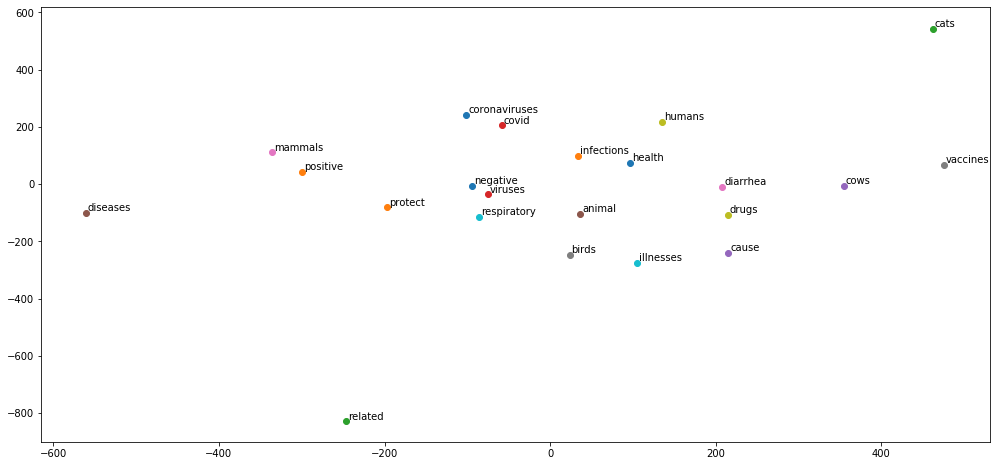

In [10]:
#Plot of similar words
from sklearn.manifold import  TSNE
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in words_list:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(17,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)

## From above we can visualize that animal -birds,coronavirus-covid,viruses-negative and drugs -cause-diarrhea are most similar words.